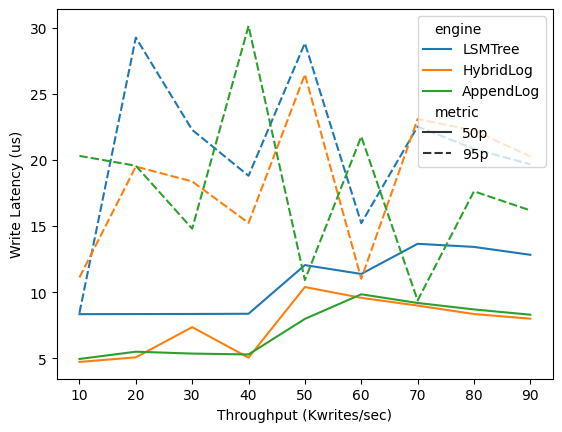


\begin{figure}[H]
    \centering
    \includegraphics[width=0.6\textwidth]{write-throughput.png}
    \caption{klen 5 vlen 5}
    \label{fig:write-throughput}
\end{figure}



In [3]:
import sys
sys.path.append('..')
from utils import *
from distributions import Uniform, Zipfian, HotSet
from kevo import LSMTree, AppendLog, HybridLog, MemOnly, PathReplica


def measure_throughput_latency_writes(db, distro, keys_set, vals_set, n_ops, engine, eng_comb, **args):
    res = []

    seconds = 10
    writes_per_secs = list(range(10_000, 100_000, 10_000))
    # writes_per_secs = list(range(1_000, 20_000, 1_000))

    for writes_per_sec in writes_per_secs:
        latencies = []
        for i in range(seconds):
            # pick key/values to write
            with Timer() as latency:
                for _ in range(writes_per_sec):
                    db[keys_set[next(distro)]] = vals_set[next(distro)]
            latency = float(latency)
            avg_latency = latency / writes_per_sec
            # if latency < 1:
            #     sleep(1 - latency)
            latencies.append(avg_latency)

        res.append({'metric': '50p', 'value': percentile(latencies, 50), 'writes_per_sec': writes_per_sec/1000})
        res.append({'metric': '95p', 'value': percentile(latencies, 95), 'writes_per_sec': writes_per_sec/1000})

    return res


df = run(
    [5], [5], [100_000], [0],
    [Uniform], [{'seed': [1]}],
    [LSMTree, HybridLog, AppendLog], [{
        'max_runs_per_level': [10],
        'density_factor': [10],
        'memtable_bytes_limit': [100_000],
        'replica': [None]
    },
    {
        'max_runs_per_level': [10],
        'mem_segment_len': [21_000],
        'ro_lag_interval': [10_000],
        'flush_interval': [10_000],
        'hash_index': ['dict'],
        'compaction_enabled': [False],
        'replica': [None]
    },
    {
        'max_runs_per_level': [10],
        'threshold': [100_000],
        'replica': [None]
    }],
    [measure_throughput_latency_writes], {}
)

data = df[['writes_per_sec', 'metric', 'value', 'engine']]
data = data[data['metric'].isin(['50p', '95p'])]
data['value'] = data['value'] * 1000000

lineplot(data, 'writes_per_sec', 'value', 'write-throughput',
         hue='engine', style='metric',
         X='Throughput (Kwrites/sec)', Y='Write Latency (us)',
         caption='klen 5 vlen 5',
         save=True, show=True)

#5,5,100k,lookparams,10sec

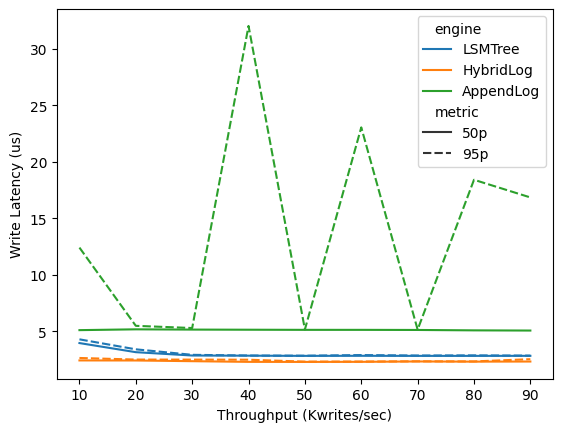


\begin{figure}[H]
    \centering
    \includegraphics[width=0.6\textwidth]{write-throughput-fit-mem.png}
    \caption{klen 5 vlen 5}
    \label{fig:write-throughput-fit-mem}
\end{figure}



In [5]:
import sys
sys.path.append('..')
from utils import *
from distributions import Uniform, Zipfian, HotSet
from kevo import LSMTree, AppendLog, HybridLog, MemOnly, PathReplica


def measure_throughput_latency_writes(db, distro, keys_set, vals_set, n_ops, engine, eng_comb, **args):
    res = []

    seconds = 10
    writes_per_secs = list(range(10_000, 100_000, 10_000))
    # writes_per_secs = list(range(1_000, 20_000, 1_000))

    for writes_per_sec in writes_per_secs:
        latencies = []
        for i in range(seconds):
            # pick key/values to write
            with Timer() as latency:
                for _ in range(writes_per_sec):
                    db[keys_set[next(distro)]] = vals_set[next(distro)]
            latency = float(latency)
            avg_latency = latency / writes_per_sec
            # if latency < 1:
            #     sleep(1 - latency)
            latencies.append(avg_latency)

        res.append({'metric': '50p', 'value': percentile(latencies, 50), 'writes_per_sec': writes_per_sec/1000})
        res.append({'metric': '95p', 'value': percentile(latencies, 95), 'writes_per_sec': writes_per_sec/1000})

    return res


df = run(
    [5], [5], [100_000], [0],
    [Uniform], [{'seed': [1]}],
    [LSMTree, HybridLog, AppendLog], [{
        'max_runs_per_level': [10],
        'density_factor': [10],
        'memtable_bytes_limit': [1_000_000],
        'replica': [None]
    },
    {
        'max_runs_per_level': [10],
        'mem_segment_len': [210_000],
        'ro_lag_interval': [100_000],
        'flush_interval': [100_000],
        'hash_index': ['dict'],
        'compaction_enabled': [False],
        'replica': [None]
    },
    {
        'max_runs_per_level': [10],
        'threshold': [1_000_000],
        'replica': [None]
    }],
    [measure_throughput_latency_writes], {}
)

data = df[['writes_per_sec', 'metric', 'value', 'engine']]
data = data[data['metric'].isin(['50p', '95p'])]
data['value'] = data['value'] * 1000000

lineplot(data, 'writes_per_sec', 'value', 'write-throughput-fit-mem',
         hue='engine', style='metric',
         X='Throughput (Kwrites/sec)', Y='Write Latency (us)',
         caption='klen 5 vlen 5',
         save=True, show=True)

#same as above but the params are higher

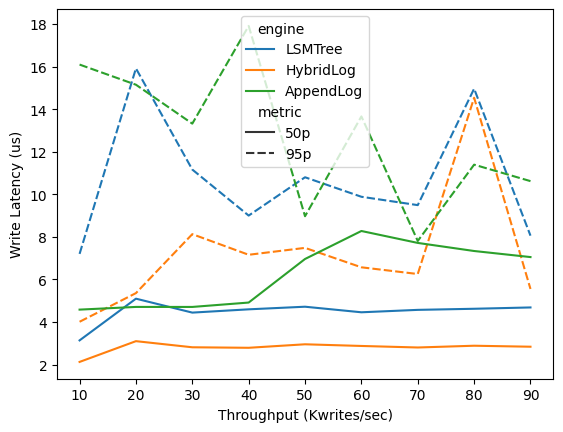


\begin{figure}[H]
    \centering
    \includegraphics[width=0.6\textwidth]{write-throughput-zipfian.png}
    \caption{klen 5 vlen 5}
    \label{fig:write-throughput-zipfian}
\end{figure}



In [6]:
import sys
sys.path.append('..')
from utils import *
from distributions import Uniform, Zipfian, HotSet
from kevo import LSMTree, AppendLog, HybridLog, MemOnly, PathReplica


def measure_throughput_latency_writes(db, distro, keys_set, vals_set, n_ops, engine, eng_comb, **args):
    res = []

    seconds = 10
    writes_per_secs = list(range(10_000, 100_000, 10_000))
    # writes_per_secs = list(range(1_000, 20_000, 1_000))

    for writes_per_sec in writes_per_secs:
        latencies = []
        for i in range(seconds):
            # pick key/values to write
            with Timer() as latency:
                for _ in range(writes_per_sec):
                    db[keys_set[next(distro)]] = vals_set[next(distro)]
            latency = float(latency)
            avg_latency = latency / writes_per_sec
            # if latency < 1:
            #     sleep(1 - latency)
            latencies.append(avg_latency)

        res.append({'metric': '50p', 'value': percentile(latencies, 50), 'writes_per_sec': writes_per_sec/1000})
        res.append({'metric': '95p', 'value': percentile(latencies, 95), 'writes_per_sec': writes_per_sec/1000})

    return res


df = run(
    [5], [5], [100_000], [0],
    [Zipfian], [{'seed': [1]}],
    [LSMTree, HybridLog, AppendLog], [{
        'max_runs_per_level': [10],
        'density_factor': [10],
        'memtable_bytes_limit': [100_000],
        'replica': [None]
    },
    {
        'max_runs_per_level': [10],
        'mem_segment_len': [21_000],
        'ro_lag_interval': [10_000],
        'flush_interval': [10_000],
        'hash_index': ['dict'],
        'compaction_enabled': [False],
        'replica': [None]
    },
    {
        'max_runs_per_level': [10],
        'threshold': [100_000],
        'replica': [None]
    }],
    [measure_throughput_latency_writes], {}
)

data = df[['writes_per_sec', 'metric', 'value', 'engine']]
data = data[data['metric'].isin(['50p', '95p'])]
data['value'] = data['value'] * 1000000

lineplot(data, 'writes_per_sec', 'value', 'write-throughput-zipfian',
         hue='engine', style='metric',
         X='Throughput (Kwrites/sec)', Y='Write Latency (us)',
         caption='klen 5 vlen 5',
         save=True, show=True)

#same as first but zipfian

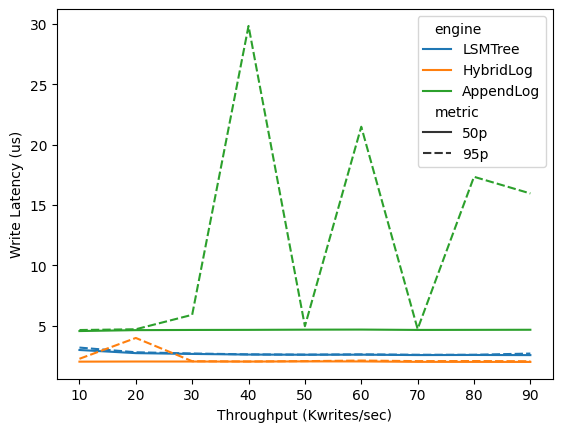


\begin{figure}[H]
    \centering
    \includegraphics[width=0.6\textwidth]{write-throughput-fit-mem-zipf.png}
    \caption{klen 5 vlen 5}
    \label{fig:write-throughput-fit-mem-zipf}
\end{figure}



In [8]:
import sys
sys.path.append('..')
from utils import *
from distributions import Uniform, Zipfian, HotSet
from kevo import LSMTree, AppendLog, HybridLog, MemOnly, PathReplica


def measure_throughput_latency_writes(db, distro, keys_set, vals_set, n_ops, engine, eng_comb, **args):
    res = []

    seconds = 10
    writes_per_secs = list(range(10_000, 100_000, 10_000))
    # writes_per_secs = list(range(1_000, 20_000, 1_000))

    for writes_per_sec in writes_per_secs:
        latencies = []
        for i in range(seconds):
            # pick key/values to write
            with Timer() as latency:
                for _ in range(writes_per_sec):
                    db[keys_set[next(distro)]] = vals_set[next(distro)]
            latency = float(latency)
            avg_latency = latency / writes_per_sec
            # if latency < 1:
            #     sleep(1 - latency)
            latencies.append(avg_latency)

        res.append({'metric': '50p', 'value': percentile(latencies, 50), 'writes_per_sec': writes_per_sec/1000})
        res.append({'metric': '95p', 'value': percentile(latencies, 95), 'writes_per_sec': writes_per_sec/1000})

    return res


df = run(
    [5], [5], [100_000], [0],
    [Zipfian], [{'seed': [1]}],
    [LSMTree, HybridLog, AppendLog], [{
        'max_runs_per_level': [10],
        'density_factor': [10],
        'memtable_bytes_limit': [1_000_000],
        'replica': [None]
    },
    {
        'max_runs_per_level': [10],
        'mem_segment_len': [210_000],
        'ro_lag_interval': [100_000],
        'flush_interval': [100_000],
        'hash_index': ['dict'],
        'compaction_enabled': [False],
        'replica': [None]
    },
    {
        'max_runs_per_level': [10],
        'threshold': [1_000_000],
        'replica': [None]
    }],
    [measure_throughput_latency_writes], {}
)

data = df[['writes_per_sec', 'metric', 'value', 'engine']]
data = data[data['metric'].isin(['50p', '95p'])]
data['value'] = data['value'] * 1000000

lineplot(data, 'writes_per_sec', 'value', 'write-throughput-fit-mem-zipf',
         hue='engine', style='metric',
         X='Throughput (Kwrites/sec)', Y='Write Latency (us)',
         caption='klen 5 vlen 5',
         save=True, show=True)

#same as second but zipfian